In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
Data_Churn=pd.read_csv('datasets_84176_195306_WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exploring Data

In [192]:
Data_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
Data_Churn.shape

(7043, 21)

In [194]:
Data_Churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [195]:
Data_Churn['Partner'].value_counts().sort_index()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [196]:
Data_Churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [197]:
Data_Churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [198]:
#replace yes=1 , No=0
subset=['Dependents','PaperlessBilling','Churn','Partner']

In [199]:
for i in range(len(subset)):
    Data_Churn[subset[i]].replace(to_replace='No',value=0,inplace=True)
    Data_Churn[subset[i]].replace(to_replace='Yes',value=1,inplace=True)

In [200]:
Data_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [201]:
#Check if here outlier values

In [202]:
for x in Data_Churn.columns.values:
    try:
        print(Data_Churn[x].value_counts().sort_index())
    except:
        continue


0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64
Female    3488
Male      3555
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 73, dtype: int64
No      682
Yes    6361
Name: PhoneService, dtype: int64
No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: int64
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64
No                     3498
No internet service    1526
Yes                    2019
Name: OnlineSecurity, dtype: int64
No                     3088
No internet

In [203]:
 Data_Churn.corr()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.156530,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,-0.014877,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.111377,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.006152,0.247900,-0.352229
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,1.000000,0.352150,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.352150,1.000000,0.193356
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.191825,0.193356,1.000000


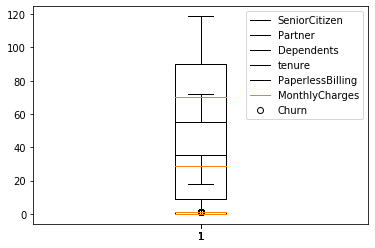

In [204]:
plt.figure()
legends=[]
for x in Data_Churn.columns.values:
    try:
        plt.boxplot(Data_Churn[x])  
        legends.append(x)
    except:
        continue
plt.legend(legends)    

In [205]:
Data_Churn.corr()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.156530,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,-0.014877,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.111377,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.006152,0.247900,-0.352229
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,1.000000,0.352150,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.352150,1.000000,0.193356
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.191825,0.193356,1.000000


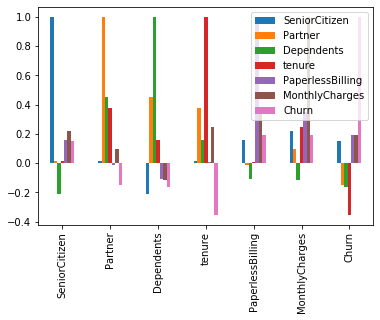

In [206]:

Data_Churn.corr().plot(kind='bar')

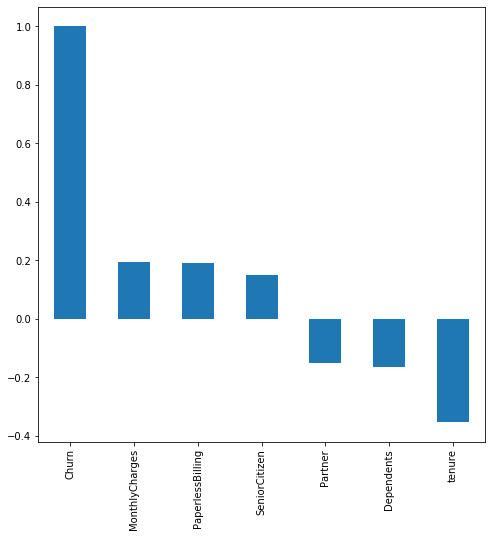

In [207]:
plt.figure(figsize=(8,8))
Data_Churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

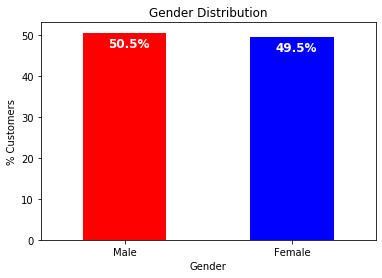

In [208]:
colors = ['red','b']
ax = (Data_Churn['gender'].value_counts()*100.0 /len(Data_Churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.set_title('Gender Distribution')
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
#to write  precent to bar
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')



Text(0.5, 1.0, '% of Senior Citizens')

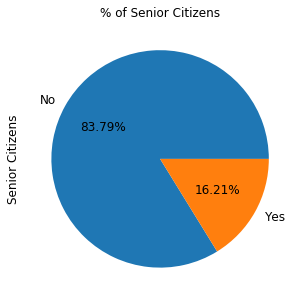

In [209]:
ax = (Data_Churn['SeniorCitizen'].value_counts()*100.0 /len(Data_Churn))\
.plot.pie(autopct='%.2f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)


In [210]:

#Remove customer IDs from the data set
df2 = Data_Churn.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,0,1,1,29.85,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,34,0,56.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,1,53.85,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,45,0,42.30,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,1,70.70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


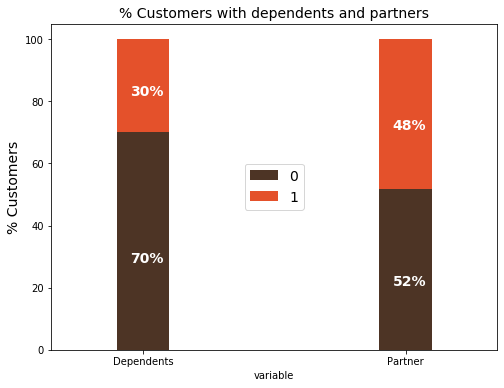

In [211]:
df2 = pd.melt(Data_Churn, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(Data_Churn)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

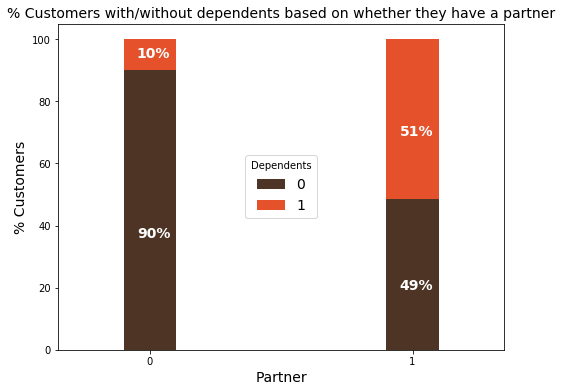

In [212]:
colors = ['#4D3425','#E4512B']
partner_dependents = Data_Churn.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)

ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# Customer Account Information:

In [213]:
import seaborn as sns

Text(0.5, 1.0, '# of Customers by their tenure')

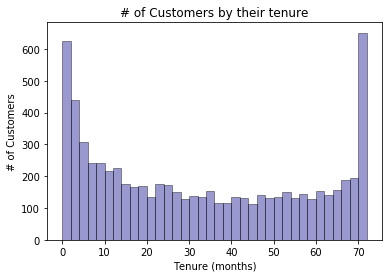

In [214]:
ax = sns.distplot(Data_Churn['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

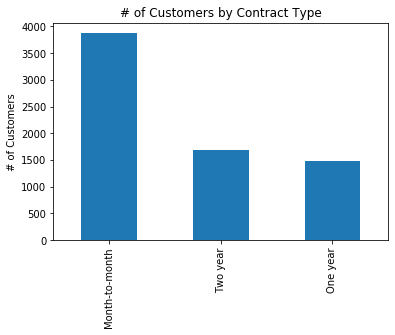

In [215]:
ax = Data_Churn['Contract'].value_counts().plot(kind = 'bar', width = 0.5)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

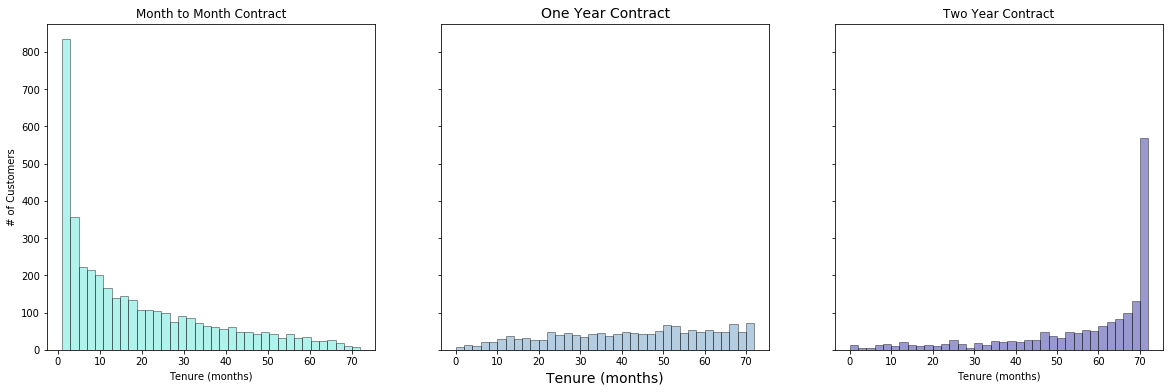

In [216]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(Data_Churn[Data_Churn['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(Data_Churn[Data_Churn['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(Data_Churn[Data_Churn['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 8},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

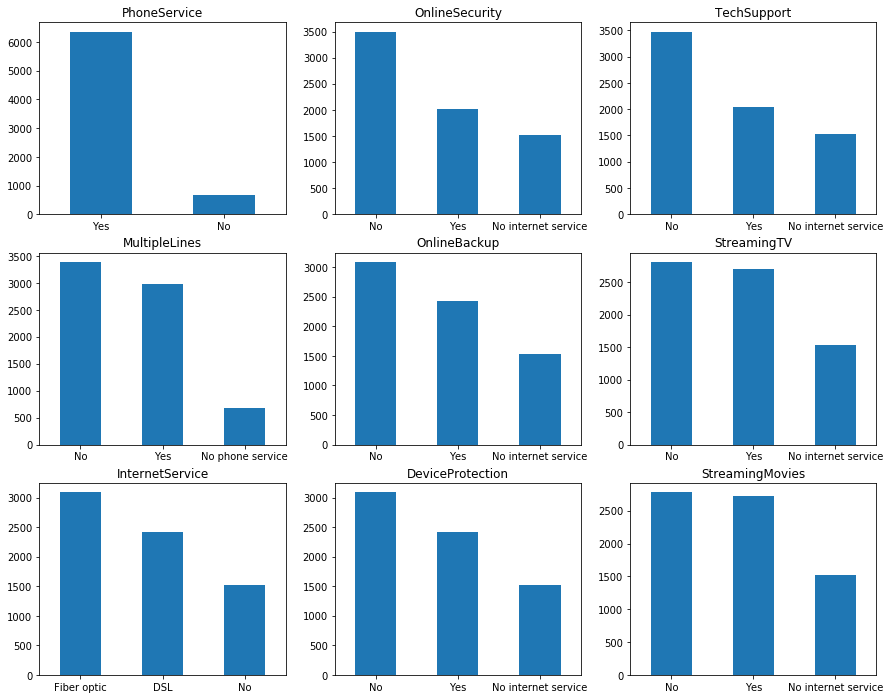

In [217]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Data_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Data_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Data_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

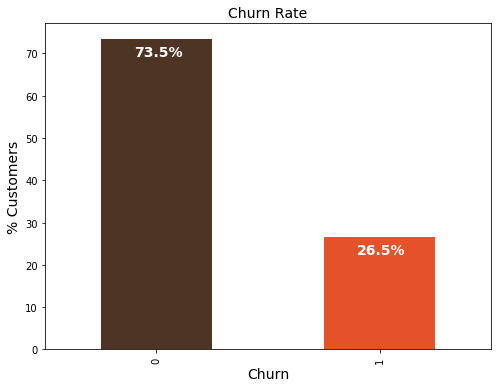

In [218]:
colors = ['#4D3425','#E4512B']
ax = (Data_Churn['Churn'].value_counts()*100.0 /len(Data_Churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          color = colors,
                                                                         figsize = (8,6))

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Text(0, 0.5, 'TotalCharges')

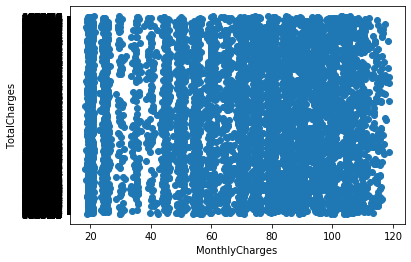

In [219]:
plt.figure()
plt.scatter(Data_Churn['MonthlyCharges'],Data_Churn['TotalCharges'])
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")

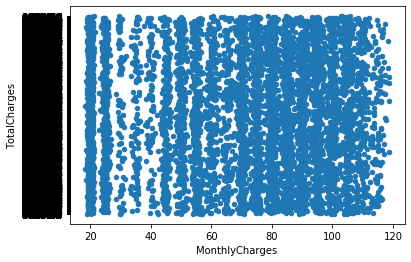

In [220]:
Data_Churn[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

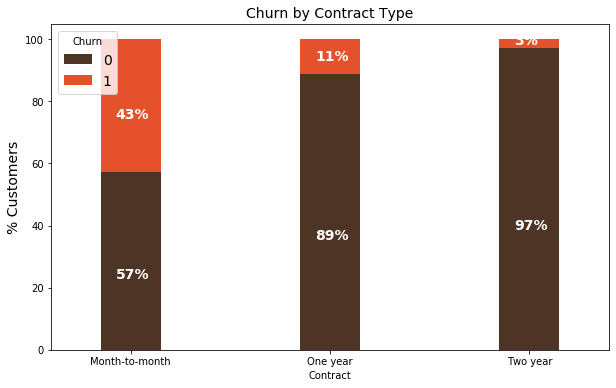

In [221]:
contract_churn = Data_Churn.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# olors = ['#4D3425','#E4512B']
seniority_churn = Data_Churn.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

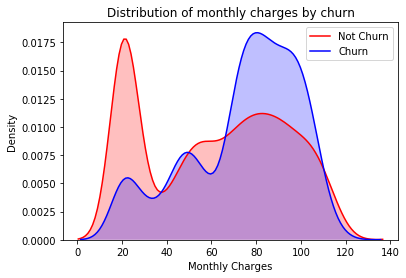

In [230]:
ax = sns.kdeplot(Data_Churn.MonthlyCharges[(Data_Churn["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(Data_Churn.MonthlyCharges[(Data_Churn["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Logistic Regression